# Projeto Prático 2
## Disciplina: Redes Neurais Artificais
 Alunos:
 Adham Lucas (1715310001),
 Enrique Izel (1715310048),
 Nayara Cerdeira (1715310038),
 Vitor Simões (1715310025).
 ### Código: 2

# Importação das Bibliotecas
Esta primeira cedula foi destinada a importação das bibliotecas utilizadas

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from ellolib import Perceptron

# Abertura dos dados
Dados no formato txt com conteúdo em binário descrevendo um numpy.ndarray

In [10]:
file = np.fromfile("./rna-2020.1-pp2-data/dataAll.txt")
file = file.reshape((int(file.shape[0] / 3), 3))

## Parte 1 - Resolvendo Problema Linearmente Separavél

In [17]:
b = Perceptron(dataset= file)
b.fit()
print("## reta")
reta = b.generate_hyperplane()
print(b.x_training.shape[0])

------ Epoch 1 ------
### Weights [ 0.14547617 83.02996528 79.39195927]
### Weights [ 4.54761713e-02  1.35618495e+02 -1.92771007e+01]
### Weights [  0.14547617  95.60958528 -97.16979073]
### Weights [  0.24547617 145.07040528 -48.27574073]
### Weights [   0.34547617  105.52115528 -145.36978073]
### Weights [  0.44547617 197.76313528 -58.89721073]
### Weights [  0.54547617 185.86602528 -86.79675073]
### Weights [   0.64547617  157.65856528 -120.38087073]
### Weights [   0.54547617   92.96530528 -201.75200073]
### Weights [   0.64547617  131.33959528 -182.48800073]
### Weights [   0.74547617  201.53333528 -115.26232073]
### Weights [   0.64547617  137.24412528 -183.32695073]
### Weights [   0.74547617  202.23528528 -122.43527073]
### Weights [   0.64547617  151.30170528 -185.83524073]
### Weights [   0.54547617  227.28502528 -121.65557073]
### Weights [   0.44547617  163.17526528 -210.00127073]
### Weights [   0.54547617  250.31002528 -123.31144073]
### Weights [   0.64547617  198.394695

## Gráfico com a reta de separação das classes
reta obtida com o treinamento do neurônio

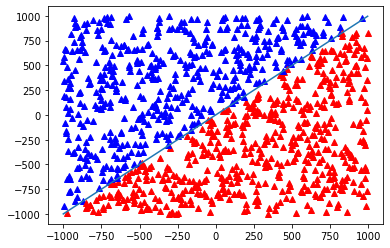

In [16]:
color = ['^b', '^r']

for point,y in zip(b.x_training, b.y_training):
    plt.plot(point[0], point[1], color[int(y)])

plt.plot(reta[0], reta[1])


# Parte 2 - Experimentação
Foi utilizado o data2.txt

In [3]:
file = np.fromfile("./rna-2020.1-pp2-data/data2.txt")
file = file.reshape((int(file.shape[0] / 3), 3))
print(file)
learn_taxs = [0.4, 0.1, 0.01]
weights = [[-100,  100], [-1,  1], [-0.5,  0.5]]

results = {}

for tax in learn_taxs:
    for weight in weights:
        key = str(tax) + str(weight)
        results[key] = []
        print(key)

        for i in range(0, 101):
            b = Perceptron(
                    dataset=file, weight_random_seed=weight, learn_tax=tax)
            b.fit()

            results[key].append({
                    'hyperplane': b.generate_hyperplane(),
                    'number_of_weights_adjust': b.number_of_weights_adjust,
                    'number_of_epochs': b.number_of_epochs
                })
print(results)

 0.37760909,  0.41081672,  0.44402435,  0.47723197,
        0.5104396 ,  0.54364722,  0.57685485,  0.61006247,  0.6432701 ,
        0.67647773,  0.70968535,  0.74289298,  0.7761006 ,  0.80930823,
        0.84251585,  0.87572348,  0.90893111,  0.94213873,  0.97534636,
        1.00855398,  1.04176161,  1.07496923,  1.10817686,  1.14138448,
        1.17459211,  1.20779974,  1.24100736,  1.27421499,  1.30742261]), [-0.0024303293639701407, -0.04221803596573337, -0.0820057425674966, -0.12179344916925983, -0.16158115577102306, -0.20136886237278628, -0.24115656897454948, -0.28094427557631274, -0.32073198217807597, -0.3605196887798392, -0.4003073953816024, -0.44009510198336566, -0.47988280858512883, -0.5196705151868921, -0.5594582217886552, -0.5992459283904186, -0.6390336349921817, -0.6788213415939449, -0.7186090481957083, -0.7583967547974714, -0.7981844613992347, -0.8379721680009979, -0.8777598746027612, -0.9175475812045244, -0.9573352878062875, -0.9971229944080509, -1.036910701009814, -1.0766

In [4]:
print(results)

 0.37760909,  0.41081672,  0.44402435,  0.47723197,
        0.5104396 ,  0.54364722,  0.57685485,  0.61006247,  0.6432701 ,
        0.67647773,  0.70968535,  0.74289298,  0.7761006 ,  0.80930823,
        0.84251585,  0.87572348,  0.90893111,  0.94213873,  0.97534636,
        1.00855398,  1.04176161,  1.07496923,  1.10817686,  1.14138448,
        1.17459211,  1.20779974,  1.24100736,  1.27421499,  1.30742261]), [-0.0024303293639701407, -0.04221803596573337, -0.0820057425674966, -0.12179344916925983, -0.16158115577102306, -0.20136886237278628, -0.24115656897454948, -0.28094427557631274, -0.32073198217807597, -0.3605196887798392, -0.4003073953816024, -0.44009510198336566, -0.47988280858512883, -0.5196705151868921, -0.5594582217886552, -0.5992459283904186, -0.6390336349921817, -0.6788213415939449, -0.7186090481957083, -0.7583967547974714, -0.7981844613992347, -0.8379721680009979, -0.8777598746027612, -0.9175475812045244, -0.9573352878062875, -0.9971229944080509, -1.036910701009814, -1.0766

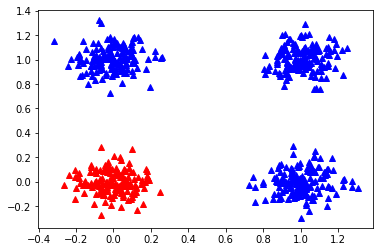

In [53]:
color = ['^b', '^r']

for point,y in zip(b.x_training, b.y_training):
    plt.plot(point[0], point[1], color[int(y)])

#plt.plot(results[key][0]['hyperplane'][0], results[key][0]['hyperplane'][1])


In [37]:
for key in results:
    test += results[key][0]['number_of_weights_adjust']
    print(key)

0.4[-100, 100]
0.4[-1, 1]
0.4[-0.5, 0.5]
0.1[-100, 100]
0.1[-1, 1]
0.1[-0.5, 0.5]
0.01[-100, 100]
0.01[-1, 1]
0.01[-0.5, 0.5]


In [43]:
print(results[key][0]['hyperplane'][0])

[-0.31975104 -0.28654342 -0.25333579 -0.22012817 -0.18692054 -0.15371292
 -0.12050529 -0.08729767 -0.05409004 -0.02088241  0.01232521  0.04553284
  0.07874046  0.11194809  0.14515571  0.17836334  0.21157097  0.24477859
  0.27798622  0.31119384  0.34440147  0.37760909  0.41081672  0.44402435
  0.47723197  0.5104396   0.54364722  0.57685485  0.61006247  0.6432701
  0.67647773  0.70968535  0.74289298  0.7761006   0.80930823  0.84251585
  0.87572348  0.90893111  0.94213873  0.97534636  1.00855398  1.04176161
  1.07496923  1.10817686  1.14138448  1.17459211  1.20779974  1.24100736
  1.27421499  1.30742261]


# Parte 3 - Problema Não- Linearmente Separavél

In [6]:
file = np.fromfile("./rna-2020.1-pp2-data/dataHoldout.txt")
file = file.reshape((int(file.shape[0] / 3), 3))

In [10]:
b = Perceptron(dataset=file,split="holdout")
    #b.fit()
b.fit2(100)
confusion_matrix = b.get_confusion_matrix(b.y_test, b.predict(), [0, 1])
accuracy = b.get_accuracy(confusion_matrix)
precision = b.get_precision(confusion_matrix)
recall = b.get_recall(confusion_matrix)
f_score = b.get_f_score(precision, recall)


.35567182]
### Weights [-0.17503473 -0.47634798 -0.45533181]
### Weights [-0.27503473 -0.43004384 -0.44592634]
### Weights [-0.17503473 -0.50796771 -0.41218842]
### Weights [-0.27503473 -0.4712378  -0.4046735 ]
### Weights [-0.17503473 -0.54327282 -0.38579555]
### Weights [-0.27503473 -0.51603454 -0.36743615]
### Weights [-0.17503473 -0.50351136 -0.40959421]
### Weights [-0.27503473 -0.483211   -0.38999885]
### Weights [-0.17503473 -0.46830975 -0.46030708]
### Weights [-0.27503473 -0.45153398 -0.43747602]
### Weights [-0.17503473 -0.40684864 -0.53678449]
### Weights [-0.27503473 -0.38773794 -0.51572583]
### Weights [-0.17503473 -0.46545025 -0.50412966]
### Weights [-0.27503473 -0.43821197 -0.48577026]
### Weights [-0.17503473 -0.54101896 -0.4461293 ]
### Weights [-0.07503473 -0.52562148 -0.50019206]
### Weights [-0.17503473 -0.5185927  -0.46113575]
### Weights [-0.27503473 -0.50322104 -0.43405768]
### Weights [-0.17503473 -0.55863945 -0.39402436]
### Weights [-0.27503473 -0.52190954 -0

### Matriz de confusão

In [12]:
print(confusion_matrix)

[[168   1]
 [ 20  51]]


### Acurácia

In [13]:
print(accuracy)

0.9125


### Precisão

In [14]:
print(precision)

0.9940828402366864


### Revocação

In [15]:
print(recall)

0.8936170212765957


### F-score

In [16]:
print(f_score)

0.9411764705882352
